# Determining bounds [-M1, M2]

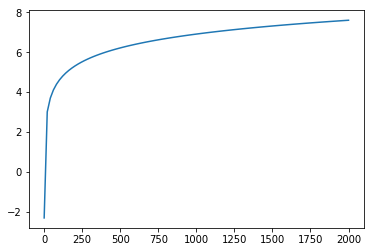

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp


x = np.linspace(0.1, 2000, 100)
y = np.log(x)

plt.plot(x, y)

# Variables

In [6]:
Nx = 100
Nt = 100

r = 0.04
sigma = 0.30
T = 1
K = 99
s_0 = 100

x = np.linspace(0, 6, Nx)
upper_bound = np.exp(max(x))

dt = T/Nt
dx = upper_bound/Nx

# Initializing first row of grid points and boundary conditions

In [7]:
#Vector of grid points
def initialize_grid(K, Nx, upper_bound, boundary):
    grid_vec = [max(0, np.exp(i) - K) for i in np.linspace(0, 6, Nx)]
    
    #Dirichlet Boundary conditions
    if boundary == 'dirichlet':
        grid_vec[0] = 0
        grid_vec[-1] = upper_bound
    
    return(np.array(grid_vec))

initialize_grid(K, Nx, upper_bound, 'dirichlet')

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

# FTCS - Compute Diagonals


In [8]:
#For FTCS the scheme can be simplified to two tridiagonal matrix multiplications
#In this case B is the identity matrix, so only the diagonals of A will be computed here

Nx = 10
Nt = 10

grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')

def compute_matrix_FTCS(grid_vec, r, sigma, Nx, Nt, upper_bound, T):
    
    dx = upper_bound/Nx
    dt = T/Nt
    
    c1 = (r - 0.5*(sigma**2))*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0
    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0
    
    C = np.identity(Nx)
    C[0] = 0
    C[-1] = 0
    
    matrix = (1-r*dt)*C + c1*A + c2*B
    
    return matrix

compute_matrix_FTCS(grid_vec, r, sigma, Nx, Nt, upper_bound, T)

matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [2.45768494e-06, 9.95994470e-01, 3.07210618e-06, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.45768494e-06, 9.95994470e-01, 3.07210618e-06,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.45768494e-06, 9.95994470e-01,
         3.07210618e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.45768494e-06,
         9.95994470e-01, 3.07210618e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0

# FTCS Simulation

In [51]:


Nx = 1000
Nt = 1000

#Returns options values one year from expiration

def FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')
    
    dx = upper_bound/Nx
    dt = T/Nt
    
    c1 = (r - 0.5*(sigma**2))*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0
    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0
    
    C = np.identity(Nx)
    C[0] = 0
    C[-1] = 0
    
    matrix = ((1-r*dt)*C + c1*A + c2*B)
    
    value_list = [grid_vec]
    
    for i in range(Nt):
        new_grid_vec = np.array(matrix.dot(value_list[i]))[-1]
        new_grid_vec[-1] = upper_bound
        value_list.append(new_grid_vec)
    
    return value_list[-1]

FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

# Ensuring this reformulation is consistent with other FTCS ouput

# Crank Nicholson - Compute diagonals

In [11]:
grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')

#Not impemented - Matrix vector notation will have A and B both sparse

#This will give a system of equations to be solved simulataneously

def compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T):
    
    a = (r - 0.5*(sigma**2))*dt/(4*dx)
    b = (1/4)*(sigma**2)*(dt/dx**2)
    c = r*dt/2

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0

    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0

    v_new = ((1-r*dt)*np.identity(Nx) + c1*A + c2*B).dot(grid_vec)

    print((1-r*dt)*np.identity(Nx) + c1*A + c2*B)
    
compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T)

NameError: name 'c1' is not defined

# FTCS simulation

In [ ]:
Nx = 1000
Nt = 1000


def simulate_FTCS(r, sigma, Nx, Nt, upper_bound, T, K, boundary):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, boundary)
    values_each_t = [grid_vec]
    
    for i in range(Nt):
        next_vec = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)
        values_each_t.append(next_vec)
        
    return values_each_t[-1]


values = simulate_FTCS(r, sigma, Nx, Nt, upper_bound, T, K, 'dirichlet')   

print('For an initial ')
        

# comparison with previous work

In [59]:
#initial vectors
# Option pricing using black scholes analytical
from scipy.stats import norm

r = 0.04
sigma = 0.30
T = 1
K = 99
S = 100


def BS_option(S, K, T, r, sigma):
    d1 = np.log(S/K)+(r+sigma**2/2)*T / sigma*np.sqrt(T)
    d2 = d1-sigma*np.sqrt(T)

    return max(0, S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2))

def BS_delta(S):
    d1 = np.log(S/K)+(r+sigma**2/2)*T / sigma*np.sqrt(T)
    
    return norm.cdf(d1)

Xs = initialize_grid(K, Nx, upper_bound, 'dirichlet')

Nx = 1000
prices = np.linspace(0, 6, Nx)

print(BS_option(100, K, T, r, sigma))
print(BS_delta(100))

14.230543210539231
0.6153855466784359


# Calculating Delta using scheme values

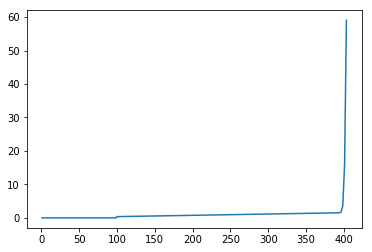

In [88]:
option_values = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)

def deltas():
    
    #run FTCS simulation to find option values
    option_values = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)
    
    dx = upper_bound/Nx
    
    deltas = []
    
    for i in range(len(option_values)):
        if i == 0:
            deltas.append(0)
        else:
            dV = option_values[i] - option_values[i-1]
            dS = np.exp(dx)
            delta = dV/dS
            deltas.append(delta)
        
    return deltas
        
#print(deltas())

import matplotlib.pyplot as plt

prices = [np.exp(i) for i in np.linspace(0, 6, Nx)]

plt.plot(prices, deltas())